# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [98]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
from os import listdir # to get the file names
from os.path import isfile, join # to get the file names
import pylab # to plot figures

In [99]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [100]:
# name of the folder which contains lego data
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [101]:
# array containing the name of files contained in the folder
datafiles = [f for f in listdir(LEGO_DATA_FOLDER) if isfile(join(LEGO_DATA_FOLDER, f))]
datafiles

['colors.csv.zip',
 'inventories.csv.zip',
 'inventory_parts.csv.zip',
 'inventory_sets.csv.zip',
 'parts.csv.zip',
 'part_categories.csv.zip',
 'sets.csv.zip',
 'themes.csv.zip']

In [102]:
# removing the last characters of the file names ('.csv.zip')
datanames = datafiles.copy()
for i in range(len(datanames)):
    temp = datanames[i]
    datanames[i] = temp[0:-8]
datanames

['colors',
 'inventories',
 'inventory_parts',
 'inventory_sets',
 'parts',
 'part_categories',
 'sets',
 'themes']

In [103]:
# reading csv files and storing the datasets into a dictionary (using the modified file names as keys)
my_data = {}

for i in range(len(datafiles)):
    my_data[datanames[i]]= pd.read_csv(LEGO_DATA_FOLDER + '/' + datafiles[i])

In [104]:
# displaying the keys of the dictionary
my_data.keys()

dict_keys(['colors', 'inventories', 'inventory_parts', 'inventory_sets', 'parts', 'part_categories', 'sets', 'themes'])

In [105]:
# checking that the data have been effectively stored
my_data['colors'].head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [106]:
# declaring a DataFrame variable containing the 'sets' dataset
sets = my_data['sets'].copy()

In [107]:
# displaying the first samples of the dataset
sets.head(100)

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,19788,186,15
8,00-2,Weetabix Promotional House 1,1976,413,147
9,00-3,Weetabix Promotional House 2,1976,413,149


In [108]:
# describing statistically the numerical features of the dataset
sets.describe()

,theme_id,num_parts
count,11673.000000,11673.000000
mean,311.308575,162.262400
std,177.999101,330.192108
min,1.000000,-1.000000
25%,161.000000,10.000000
50%,324.000000,45.000000
75%,470.000000,172.000000
max,614.000000,5922.000000


In [109]:
# checking the possible values for the feature 'year'
pd.Categorical(sets['year'])

[70s, 1978, 1987, 1979, 1979, ..., -2012, -2015, 2010, -2013, 1996]
Length: 11673
Categories (174, object): [-1962, -1966, -1969, -1971, ..., 2017, 20177, 70s, 80s]

In [110]:
# trying to convert the values of the feature 'year' to numerical values (non-convertible values are set to NaN)
sets['year'] = pd.to_numeric(sets['year'],errors="coerce")

In [111]:
# checking the type of the feature 'year'
sets.year.dtype

dtype('float64')

In [112]:
# looking for the NaN values in the column 'year'
id_na = sets['year'].isna()
original_sets = my_data['sets'].copy()
original_sets[id_na]

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
241,102A-1,Front-End Loader,70s,416,64
242,102A-2,Front-End Loader,70s,416,56
252,104-1,Replacement 4.5V Motor,70s,243,1
351,1062-1,{Town Vehicles},80s,533,158
431,1075-1,LEGO People Supplementary Set,80s,511,256
530,1129-1,Storage Cloth (Spread Bag),80s,473,1
533,1130-1,Storage Folder for Building Instructions (16 I...,80s,443,1
724,126-1,Steam Locomotive (Push),70s,235,60
1004,157-3,Four Car Auto Transport,70s,423,65


In [113]:
# checking which values they contain
pd.Categorical(original_sets['year'][id_na])

[70s, 70s, 70s, 70s, 80s, ..., 80s, 80s, 80s, 80s, 80s]
Length: 114
Categories (2, object): [70s, 80s]

In [114]:
# replacing the two possible non-numerical values to numerical, by assuming that it corresponds to a year in between 1970 and 
# 1980 for the value '70s', and between 1980 and 1990 for the value '80s'.
# Then we replaced these values respectively by 1975 and 1985 and added a column to the dataset ('year +/-') which represents the precision
# (kind of error bar) of the 'year' value. For '70s' and '80s', this precision is of +/- 5 years.
# For other values, the precision is of +/- 0 years (perfect precision).
seventies_id = original_sets['year'] == '70s'
eighties_id = original_sets['year'] == '80s'
sets['year'][seventies_id] = 1975.0
sets['year'][eighties_id] = 1985.0
sets['year +/-'] = 0
sets['year +/-'][(seventies_id)|(eighties_id)] = 5

In [115]:
# displaying the first samples of the dataset
sets.head()

,id,name,year,theme_id,num_parts,year +/-
0,00-1,Weetabix Castle,1975.0,414,471,5
1,0011-2,Town Mini-Figures,1978.0,84,12,0
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199,2,0
3,0012-1,Space Mini-Figures,1979.0,143,12,0
4,0013-1,Space Mini-Figures,1979.0,143,12,0


In [116]:
# looking for the negative values for the feature 'year', and replacing them with the opposite value
id_neg = sets['year']<0;
sets['year'][id_neg] = -sets['year'][id_neg]

In [117]:
# displaying the first samples
sets.head(100)

,id,name,year,theme_id,num_parts,year +/-
0,00-1,Weetabix Castle,1975.0,414,471,5
1,0011-2,Town Mini-Figures,1978.0,84,12,0
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199,2,0
3,0012-1,Space Mini-Figures,1979.0,143,12,0
4,0013-1,Space Mini-Figures,1979.0,143,12,0
5,0014-1,Space Mini-Figures,1979.0,143,12,0
6,0015-1,Space Mini-Figures,1979.0,143,18,0
7,0016-1,Castle Mini Figures,19788.0,186,15,0
8,00-2,Weetabix Promotional House 1,1976.0,413,147,0
9,00-3,Weetabix Promotional House 2,1976.0,413,149,0


In [118]:
# sorting the samples by year, to check that we have no more negative values
sets.sort_values(ascending=True, by=['year']).head(10)

,id,name,year,theme_id,num_parts,year +/-
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950.0,371,7,0
6954,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950.0,366,24,0
6958,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950.0,371,7,0
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950.0,371,7,0
6935,700.1.1-1,Individual 2 x 4 Bricks,1950.0,371,10,0
6938,700.1.2-1,Individual 2 x 2 Bricks,1950.0,371,9,0
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950.0,371,7,0
6955,700.B-1,Early LEGO Windows/Doors (without Glass),1953.0,371,12,0
6951,700.3.4-1,Individual 2 x 3 Bricks,1953.0,371,5,0
6942,700.1.4-1,Individual 1 x 2 Bricks,1953.0,371,1,0


In [119]:
# describing statistically the numerical features of the dataset ('year' is now a numerical feature and NaN are ignored)
sets.describe()

,year,theme_id,num_parts,year +/-
count,11673.000000,11673.000000,11673.000000,11673.000000
mean,4777.418658,311.308575,162.262400,0.048831
std,6520.165759,177.999101,330.192108,0.491721
min,1950.000000,1.000000,-1.000000,0.000000
25%,1997.000000,161.000000,10.000000,0.000000
50%,2007.000000,324.000000,45.000000,0.000000
75%,2015.000000,470.000000,172.000000,0.000000
max,20177.000000,614.000000,5922.000000,5.000000


In [120]:
# checking the type of the feature 'year'
sets['year'].dtype

dtype('float64')

In [121]:
# changing the type from float to integer
sets['year'] = sets['year'].astype(int)

In [122]:
# checking again the type of the feature 'year'
sets['year'].dtype

dtype('int32')

In [123]:
# changing the type from integer to string (this double type change allows to avoid '.0' at the end of the strings)
sets['year'] = sets['year'].astype(str)

In [124]:
# computing the number of characters for each year value (a year value should contain 4 characters, e.g. '1978')
nb_char = []
for word in sets['year']:
    nb_char.append(len(word))

In [125]:
# checking the maximal number of characters
max(nb_char)

5

In [126]:
# transforming the variable from list to numpy array
nb_char = np.array(nb_char)

In [127]:
# looking for the samples where we have 5 characters instead of 4.
indices_max = np.where(nb_char == 5)[0]
indices_max

array([    7,    30,    50, ..., 11636, 11645, 11652], dtype=int32)

In [128]:
# displaying the number of such samples
len(indices_max)

1792

In [129]:
# displaying some of these erroneous samples
sets['year'][indices_max].head(50)

7      19788
30     20011
50     20022
56     20033
59     20022
60     20022
62     20033
80     20022
89     20022
90     20022
95     20022
96     20022
99     20033
101    20044
102    20044
108    20011
118    20033
126    20055
132    20044
136    20055
151    20044
155    20066
159    20066
163    20077
168    20088
179    20099
180    20099
183    20033
185    20044
191    20100
200    20111
205    20122
208    20122
216    20133
220    20144
221    20144
224    20144
226    20011
227    20155
233    20166
235    20166
238    20111
257    20133
259    20133
262    20133
275    20144
276    20144
277    20144
279    20144
290    20144
Name: year, dtype: object

In [130]:
# couting the number of samples which have 5 characters and whose two last characters are different

counter = 0

for i in indices_max:
    if(sets['year'][i][-2] != sets['year'][i][-1]):
        counter = counter + 1

counter

0

In [131]:
# as the samples with 5 characters have always the same two last characters, we can assume that this is a typo and that we can
# remove the last character for all of them
for i in indices_max:
    sets['year'][i] = sets['year'][i][0:-1]

In [132]:
# displaying some of these corrected samples
sets['year'][indices_max].head(50)

7      1978
30     2001
50     2002
56     2003
59     2002
60     2002
62     2003
80     2002
89     2002
90     2002
95     2002
96     2002
99     2003
101    2004
102    2004
108    2001
118    2003
126    2005
132    2004
136    2005
151    2004
155    2006
159    2006
163    2007
168    2008
179    2009
180    2009
183    2003
185    2004
191    2010
200    2011
205    2012
208    2012
216    2013
220    2014
221    2014
224    2014
226    2001
227    2015
233    2016
235    2016
238    2011
257    2013
259    2013
262    2013
275    2014
276    2014
277    2014
279    2014
290    2014
Name: year, dtype: object

In [133]:
# nevertheless, some corrections that we made can be ambiguous and non-unique (e.g. we corrected '19966' into '1996' but it
# can also be corrected into '1966'). We have no way to know which typo has been made, so we choose to put NaN values for these
# cases. The cases are : 1993, 1994, 1995, 1996, 1997, 1998 and 2001.

problematic_year = np.array(range(1993,1999))
problematic_year = np.append(problematic_year,2001)

problematic_indices = []
sets['year'] = pd.to_numeric(sets['year'],errors="coerce")

ambiguous_cases = 0
for i in indices_max:
    if(int(sets['year'][i]) in list(problematic_year)):
        ambiguous_cases = ambiguous_cases + 1
        problematic_year = np.append(problematic_year,i)
        sets['year'][i] = np.nan

In [134]:
# displaying the number of NaN values
ambiguous_cases

159

In [135]:
# displaying some of the corrected samples, including NaN
sets['year'][indices_max].head(100)

7      1978.0
30        NaN
50     2002.0
56     2003.0
59     2002.0
60     2002.0
62     2003.0
80     2002.0
89     2002.0
90     2002.0
95     2002.0
96     2002.0
99     2003.0
101    2004.0
102    2004.0
108       NaN
118    2003.0
126    2005.0
132    2004.0
136    2005.0
151    2004.0
155    2006.0
159    2006.0
163    2007.0
168    2008.0
179    2009.0
180    2009.0
183    2003.0
185    2004.0
191    2010.0
        ...  
389    2015.0
397    2015.0
398    2015.0
399    2015.0
405    2017.0
411    2017.0
414    2016.0
415    2016.0
417    2016.0
420    2016.0
428    2017.0
433    1999.0
449    1999.0
458    2016.0
461    2016.0
468    2016.0
478    2017.0
502    1999.0
558    2002.0
582    2000.0
585    1999.0
600    2015.0
601    2015.0
605    2016.0
612    2000.0
656    1982.0
674    1955.0
690       NaN
705    1999.0
710    1999.0
Name: year, Length: 100, dtype: float64

In [136]:
# describing statistically the dataset (after data cleaning)
sets.describe()

,year,theme_id,num_parts,year +/-
count,11514.000000,11673.000000,11673.000000,11673.000000
mean,2002.073476,311.308575,162.262400,0.048831
std,13.477577,177.999101,330.192108,0.491721
min,1950.000000,1.000000,-1.000000,0.000000
25%,1997.000000,161.000000,10.000000,0.000000
50%,2006.000000,324.000000,45.000000,0.000000
75%,2012.000000,470.000000,172.000000,0.000000
max,2017.000000,614.000000,5922.000000,5.000000


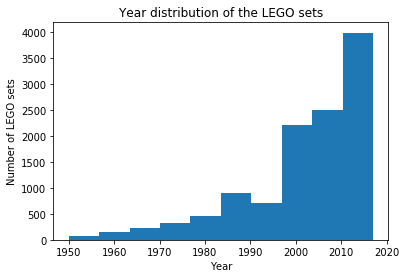

In [137]:
# plotting a histogram of the 'year' feature (after data cleaning)
pylab.figure()
pylab.hist(sets['year'][~np.isnan(sets['year'])])
pylab.ylabel('Number of LEGO sets')
pylab.xlabel('Year')
pylab.title('Year distribution of the LEGO sets')
pylab.show()

**Our approach**

First, we noticed that the 'year' feature contains non-numerical data (using the command describe()).
We checked the possible categorical values taken by this column and figured out that it contains sometimes strings like '70s', and that it contains also impossible negative values.
We converted the 'year' values to numerical when possible, putting NaN to non-convertible ones.

Then we looked for the NaN values and checked what the samples originally contained. Two possible values : '70s' and '80s'.
We assumed that it corresponds to a year in between 1970 and 1980 for the value '70s', and between 1980 and 1990 for the value '80s'.
Therefore we replaced these values with respectively 1975 and 1985, and added a column to the dataset ('year +/-') which represents the precision (kind of error bar) of the 'year' value. For '70s' and '80s', this precision is of +/- 5 years. For other values, the precision is of +/- 0 years (perfect precision).

After this, we replaced all the negative entries with the opposite values (e.g. -1971 -> 1971).

Then we statistically described the data and we observed that the averaged value for the 'year' is around 4000, which is not reasonable. We must have huge values in our dataset which bias the results.
Therefore, we checked the number of characters in each year (after converting them to strings).
We realized that indeed some samples contained 5-character years, which is not possible (maximal year is the current one, i.e. 2018).
After checking that the samples with 5 characters have always the same two last characters, we assumed that this is a typical typo and that we can remove the last character for all of them.
Nevertheless, some corrections that we made can be ambiguous and non-unique (e.g. we corrected '19966' into '1996' but it can also be corrected into '1966'). We have no way to know which typo has been made, so we choose to put NaN values for these cases. The ambiguous cases are : 1993, 1994, 1995, 1996, 1997, 1998 and 2001.

Finally, we described statistically the cleaned dataset and we plotted the histogram of the 'year' feature.
The time range of the LEGO sets is from year 1950 to year 2017.

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [138]:
inventory_sets = my_data['inventory_sets'].copy()
# sets have been declared before (+ cleaning)

In [139]:
inventory_sets.head()

,inventory_id,set_id,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [140]:
sets.head()

,id,name,year,theme_id,num_parts,year +/-
0,00-1,Weetabix Castle,1975.0,414,471,5
1,0011-2,Town Mini-Figures,1978.0,84,12,0
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199,2,0
3,0012-1,Space Mini-Figures,1979.0,143,12,0
4,0013-1,Space Mini-Figures,1979.0,143,12,0


In [141]:
# we only keep the samples whose name ends by 'car' or 'cars'

car_sets = sets.copy()
car_sets = car_sets[car_sets['name'].apply(lambda x: (x.endswith('car')) | (x.endswith('Car')) | (x.endswith('Cars')) | (x.endswith('cars')) )]

print(len(car_sets))
car_sets.head(100)                      

144


,id,name,year,theme_id,num_parts,year +/-
27,10002-1,Railroad Club Car,2001.0,233,272,0
142,10158-1,High Speed Train Car,2004.0,239,151,0
154,10170-1,TTX Intermodal Double-Stack Car,2005.0,236,365,0
250,1038-1,ERBIE the Robo-Car,1985.0,1,120,0
295,10552-1,Creative Cars,2013.0,504,42,0
325,10589-1,Rally Car,2015.0,504,13,0
446,1076-22,Advent Calendar 1999 (Day 21) Police Car,1999.0,217,11,0
505,1109-1,Magnetic Couplings for Railway Car,1977.0,456,4,0
600,11908-1,Build Your Own Adventure with Liza Mini-Doll a...,2015.0,494,77,0
705,1247-1,Patrol Car,1999.0,50,32,0


In [142]:
# we merge the 'sets' dataset of cars with the inventory_sets original dataset,
# in order to get the associated inventory IDs.

car_inventory_sets = inventory_sets.copy()

merged_car_sets = pd.merge(car_inventory_sets, car_sets, left_on = 'set_id', right_on = 'id')

print(len(merged_car_sets))
merged_car_sets.sort_values(ascending=True, by=['inventory_id']).head(100)

51


,inventory_id,set_id,quantity,id,name,year,theme_id,num_parts,year +/-
0,528,6633-1,1,6633-1,Family Car,1985.0,85,46,0
2,908,7030-1,1,7030-1,Squad Car,2003.0,111,51,0
3,1371,6611-1,1,6611-1,Fire Chief's Car,1981.0,74,20,0
5,1371,6623-1,1,6623-1,Police Car,1983.0,80,40,0
6,1401,7241-1,1,7241-1,Fire Car,2005.0,58,47,0
7,1418,7241-1,1,7241-1,Fire Car,2005.0,58,47,0
18,1649,4436-1,1,4436-1,Patrol Car,2012.0,61,96,0
21,1716,1517-1,1,1517-1,Race Car,1989.0,82,32,0
8,1732,7241-1,1,7241-1,Fire Car,2005.0,58,47,0
22,2917,4524-6,1,4524-6,Advent Calendar 2002 Creator (Day 5) Car,2002.0,223,15,0


**Our approach**

We only kept the samples where the set name ends with 'car' or 'cars'. We chose to specify that the name has to end with this word (and not just contain it), because it allows to remove samples like 'scary laboratory', 'scarox', 'heartlake puppy daycare' but still keeping 'supercar', 'handcar' or 'sidecar'.

Then we merged the cars sets dataset with the original inventory_set one, in order to get the associated inventory IDs.


## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [143]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [144]:
# array containing the name of files contained in the folder
datafiles = [f for f in listdir(BIKES_DATA_FOLDER) if isfile(join(BIKES_DATA_FOLDER, f))]
datafiles

['metro-bike-share-trip-data.json.zip']

In [145]:
trips = pd.read_json(BIKES_DATA_FOLDER + '/' + datafiles[0])


In [146]:
trips.head()

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [147]:
# displaying the number of samples
print(len(trips))

132427


In [148]:
# Displaying the type of each column
my_keys = trips.keys()
for i in range(len(my_keys)):
    print(my_keys[i],' : ',trips[my_keys[i]].dtype)

Bike ID  :  float64
Duration  :  int64
End Time  :  object
Ending Station ID  :  float64
Ending Station Latitude  :  float64
Ending Station Longitude  :  float64
Passholder Type  :  object
Plan Duration  :  float64
Start Time  :  object
Starting Station ID  :  float64
Starting Station Latitude  :  float64
Starting Station Longitude  :  float64
Trip ID  :  int64
Trip Route Category  :  object


In [149]:
# statistically describing the numerical data
trips.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


In [150]:
# displaying the different categories for the passholder type column
print('Passholder Type')
pd.Categorical(trips['Passholder Type'])

Passholder Type


[Monthly Pass, Monthly Pass, Flex Pass, Flex Pass, Walk-up, ..., Walk-up, Walk-up, Walk-up, Walk-up, Walk-up]
Length: 132427
Categories (4, object): [Flex Pass, Monthly Pass, Staff Annual, Walk-up]

In [151]:
# checking data redundancy between passholder type and plan duration columns
correlation_type_duration = trips[['Passholder Type', 'Plan Duration']]
# removing the duplicated rows
correlation_type_duration.drop_duplicates()

,Passholder Type,Plan Duration
0,Monthly Pass,30.0
2,Flex Pass,365.0
4,Walk-up,0.0
55790,Staff Annual,NaN
98675,Monthly Pass,NaN


In [152]:
# droping the plan duration column
trips = trips.drop('Plan Duration',axis=1)

In [153]:
# displaying the different categories for the trip route category column
print('Trip Route Category')
pd.Categorical(trips['Trip Route Category'])

Trip Route Category


[Round Trip, Round Trip, Round Trip, Round Trip, Round Trip, ..., One Way, One Way, One Way, One Way, One Way]
Length: 132427
Categories (2, object): [One Way, Round Trip]

In [154]:
# checking data redundancy between {trip route category} and {starting station ID, ending station ID}

# building a new DataFrame with the columns : trip route category, starting station ID and ending station ID
correlation_category_IDs = trips[['Trip Route Category', 'Starting Station ID', 'Ending Station ID']]
# droping duplicated rows
correlation_category_IDs = correlation_category_IDs.drop_duplicates()
# adding a new column representing by a boolean if the starting station and the ending station are the same
correlation_category_IDs['Same station'] = pd.Series((correlation_category_IDs['Starting Station ID'] - correlation_category_IDs['Ending Station ID'])==0)
# droping the columns 'starting station ID' and 'ending station ID'
correlation_category_IDs = correlation_category_IDs.drop(['Starting Station ID', 'Ending Station ID'],axis=1)

In [155]:
correlation_category_IDs['Consistency'] = pd.Series(  (correlation_category_IDs['Trip Route Category'].isin(['Round Trip']) &
                                                   correlation_category_IDs['Same station'].isin([True]) )   |
                                                   (correlation_category_IDs['Trip Route Category'].isin(['One Way']) &
                                                   correlation_category_IDs['Same station'].isin([False]))  )

In [156]:
correlation_category_IDs.head()

,Trip Route Category,Same station,Consistency
0,Round Trip,True,True
2,Round Trip,True,True
4,Round Trip,True,True
5,One Way,False,True
6,One Way,False,True


In [157]:
correlation_category_IDs['Consistency'].value_counts()

True     3701
False       2
Name: Consistency, dtype: int64

In [158]:
trips = trips.drop('Trip Route Category',axis=1)

In [159]:
trips['End Time'] = pd.to_datetime(trips['End Time'])
trips['Start Time'] = pd.to_datetime(trips['Start Time'])

In [160]:
# duration

correlation_time = trips[['Start Time', 'End Time', 'Duration']]
correlation_time = correlation_time.drop_duplicates()
correlation_time['Difference'] = pd.Series(correlation_time['End Time'] - correlation_time['Start Time'])
correlation_time = correlation_time.drop(['Start Time', 'End Time'],axis=1)

In [161]:
correlation_time['Difference'] = correlation_time['Difference'].dt.total_seconds()

In [162]:
correlation_time.drop_duplicates()

,Duration,Difference
0,180,180.0
1,1980,1980.0
2,300,300.0
3,10860,10860.0
4,420,420.0
5,780,780.0
6,600,600.0
8,2880,2880.0
9,960,960.0
11,720,720.0


In [163]:
correlation_time['Consistency'] = pd.Series(correlation_time['Duration'] == correlation_time['Difference'])

In [164]:
correlation_time.drop(['Duration','Difference'],axis=1)

,Consistency
0,True
1,False
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,False


In [165]:
correlation_time['Consistency'].value_counts()

True     97365
False    28547
Name: Consistency, dtype: int64

In [166]:
trips = trips.drop(['Duration'],1)
trips.head()

,Bike ID,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
0,6281.0,2016-07-07 04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,2016-07-07 04:17:00,3014.0,34.056610,-118.23721,1912818
1,6281.0,2016-07-07 06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,2016-07-07 06:00:00,3014.0,34.056610,-118.23721,1919661
2,5861.0,2016-07-07 10:37:00,3016.0,34.052898,-118.24156,Flex Pass,2016-07-07 10:32:00,3016.0,34.052898,-118.24156,1933383
3,5861.0,2016-07-07 13:38:00,3016.0,34.052898,-118.24156,Flex Pass,2016-07-07 10:37:00,3016.0,34.052898,-118.24156,1944197
4,6674.0,2016-07-07 12:58:00,3032.0,34.049889,-118.25588,Walk-up,2016-07-07 12:51:00,3032.0,34.049889,-118.25588,1940317


In [167]:
starting_stations = pd.DataFrame({'Station ID':trips['Starting Station ID'],
                     'Station Latitude':trips['Starting Station Latitude'],
                     'Station Longitude':trips['Starting Station Longitude']})

In [168]:
print(len(starting_stations))
starting_stations.head()

132427


,Station ID,Station Latitude,Station Longitude
0,3014.0,34.056610,-118.23721
1,3014.0,34.056610,-118.23721
2,3016.0,34.052898,-118.24156
3,3016.0,34.052898,-118.24156
4,3032.0,34.049889,-118.25588


In [169]:
ending_stations = pd.DataFrame({'Station ID':trips['Ending Station ID'],
                     'Station Latitude':trips['Ending Station Latitude'],
                     'Station Longitude':trips['Ending Station Longitude']})
print(len(ending_stations))
ending_stations.head()

132427


,Station ID,Station Latitude,Station Longitude
0,3014.0,34.056610,-118.23721
1,3014.0,34.056610,-118.23721
2,3016.0,34.052898,-118.24156
3,3016.0,34.052898,-118.24156
4,3032.0,34.049889,-118.25588


In [170]:
stations = pd.concat([starting_stations,ending_stations])

print(len(stations))
stations.head()

264854


,Station ID,Station Latitude,Station Longitude
0,3014.0,34.056610,-118.23721
1,3014.0,34.056610,-118.23721
2,3016.0,34.052898,-118.24156
3,3016.0,34.052898,-118.24156
4,3032.0,34.049889,-118.25588


In [171]:
# NB : we drop the duplicates based on the station ID only, because if we use all the columns, it keeps some stations ID twice
# because the latitude and/or the longitude are not exactly the same (e.g. -118.29050 and -118.29047).
# We arbitrarily kept the first occurence because we assumed that the differences are really small so we can ignore it and
# keep indifferently one or the other.

# TODO : check this difference !! maybe there is an error for a precise station (two really different geographic positions)

stations = stations.drop_duplicates(subset = ['Station ID'])
print(len(stations))
stations.sort_values(ascending=True, by=['Station ID']).head(100)

68


,Station ID,Station Latitude,Station Longitude
103005,3000.0,NaN,NaN
25,3005.0,34.048550,-118.259050
16,3006.0,34.045540,-118.256670
75,3007.0,34.050480,-118.254590
243,3008.0,34.046612,-118.262730
117835,3009.0,33.987381,-118.472832
1046,3010.0,34.037048,-118.254870
2008,3011.0,34.041130,-118.267980
0,3014.0,34.056610,-118.237210
2,3016.0,34.052898,-118.241560


In [172]:
# drop rows where station ID is NaN
stations = stations[stations['Station ID'].apply(lambda x: ~np.isnan(x) )]
print(len(stations))
stations.head(100)

67


,Station ID,Station Latitude,Station Longitude
0,3014.0,34.056610,-118.237210
2,3016.0,34.052898,-118.241560
4,3032.0,34.049889,-118.255880
5,3021.0,34.045609,-118.237030
6,3022.0,34.046070,-118.233090
7,3076.0,34.040600,-118.253840
8,3031.0,34.044701,-118.252440
11,3063.0,34.049198,-118.252830
12,3042.0,34.049301,-118.238810
13,3018.0,34.043732,-118.260140


In [173]:
# drop rows where both station latitude and longitude are NaN (= no information)
# we remove here the virtual station, is it good ?
stations = stations.dropna(thresh=2)
print(len(stations))
stations.head(100)

66


,Station ID,Station Latitude,Station Longitude
0,3014.0,34.056610,-118.237210
2,3016.0,34.052898,-118.241560
4,3032.0,34.049889,-118.255880
5,3021.0,34.045609,-118.237030
6,3022.0,34.046070,-118.233090
7,3076.0,34.040600,-118.253840
8,3031.0,34.044701,-118.252440
11,3063.0,34.049198,-118.252830
12,3042.0,34.049301,-118.238810
13,3018.0,34.043732,-118.260140


In [174]:
# we remove here the only inactive station (LA warehouse), which have as coordinates (0,0), i.e. a nonsense for Los Angeles
# is it OK ?
stations = stations[stations['Station Latitude'].apply(lambda x: (x!=0) )]
stations = stations[stations['Station Longitude'].apply(lambda x: (x!=0) )]

In [175]:
stations.describe()

,Station ID,Station Latitude,Station Longitude
count,65.000000,65.000000,65.000000
mean,3043.246154,34.044491,-118.256576
std,22.570051,0.011154,0.034164
min,3005.000000,33.987381,-118.472832
25%,3025.000000,34.039219,-118.260140
50%,3042.000000,34.045540,-118.252830
75%,3062.000000,34.050480,-118.243170
max,3082.000000,34.064281,-118.231280


In [176]:
trips = trips.drop(['Starting Station Latitude','Ending Station Latitude','Starting Station Longitude','Ending Station Longitude'],1)

#needed for the B3.4
trips_w_time = trips.copy()

trips.head()


,Bike ID,End Time,Ending Station ID,Passholder Type,Start Time,Starting Station ID,Trip ID
0,6281.0,2016-07-07 04:20:00,3014.0,Monthly Pass,2016-07-07 04:17:00,3014.0,1912818
1,6281.0,2016-07-07 06:33:00,3014.0,Monthly Pass,2016-07-07 06:00:00,3014.0,1919661
2,5861.0,2016-07-07 10:37:00,3016.0,Flex Pass,2016-07-07 10:32:00,3016.0,1933383
3,5861.0,2016-07-07 13:38:00,3016.0,Flex Pass,2016-07-07 10:37:00,3016.0,1944197
4,6674.0,2016-07-07 12:58:00,3032.0,Walk-up,2016-07-07 12:51:00,3032.0,1940317


In [177]:
durations = pd.DataFrame({'Trip ID':trips['Trip ID'],
                     'Start Time':trips['Start Time'],
                     'End Time':trips['End Time']})
durations.head()

,Trip ID,Start Time,End Time
0,1912818,2016-07-07 04:17:00,2016-07-07 04:20:00
1,1919661,2016-07-07 06:00:00,2016-07-07 06:33:00
2,1933383,2016-07-07 10:32:00,2016-07-07 10:37:00
3,1944197,2016-07-07 10:37:00,2016-07-07 13:38:00
4,1940317,2016-07-07 12:51:00,2016-07-07 12:58:00


In [178]:
durations_keys = durations.keys()
for i in range(len(durations_keys)):
    print(durations_keys[i],' : ',durations[durations_keys[i]].dtype)

Trip ID  :  int64
Start Time  :  datetime64[ns]
End Time  :  datetime64[ns]


In [179]:
durations.head()

,Trip ID,Start Time,End Time
0,1912818,2016-07-07 04:17:00,2016-07-07 04:20:00
1,1919661,2016-07-07 06:00:00,2016-07-07 06:33:00
2,1933383,2016-07-07 10:32:00,2016-07-07 10:37:00
3,1944197,2016-07-07 10:37:00,2016-07-07 13:38:00
4,1940317,2016-07-07 12:51:00,2016-07-07 12:58:00


In [180]:
durations.describe()

,Trip ID
count,1.324270e+05
mean,1.153001e+07
std,6.369462e+06
min,1.912818e+06
25%,5.060814e+06
50%,1.043827e+07
75%,1.720633e+07
max,2.379422e+07


In [181]:
trips = trips.drop(['Start Time','End Time'],1)
trips.head()

,Bike ID,Ending Station ID,Passholder Type,Starting Station ID,Trip ID
0,6281.0,3014.0,Monthly Pass,3014.0,1912818
1,6281.0,3014.0,Monthly Pass,3014.0,1919661
2,5861.0,3016.0,Flex Pass,3016.0,1933383
3,5861.0,3016.0,Flex Pass,3016.0,1944197
4,6674.0,3032.0,Walk-up,3032.0,1940317


In [182]:
trips['Passholder Type'] = trips['Passholder Type'].astype('category')
trips['Passholder Type'].dtype

CategoricalDtype(categories=['Flex Pass', 'Monthly Pass', 'Staff Annual', 'Walk-up'], ordered=False)

In [183]:
# trips
print('TRIPS')
my_keys = trips.keys()
for i in range(len(my_keys)):
    print(my_keys[i],' : ',trips[my_keys[i]].dtype)
print('\n')
print('Dimensions : ',trips.shape)
print('\n')
print(trips.describe())
trips.head()

TRIPS
Bike ID  :  float64
Ending Station ID  :  float64
Passholder Type  :  category
Starting Station ID  :  float64
Trip ID  :  int64


Dimensions :  (132427, 5)


             Bike ID  Ending Station ID  Starting Station ID       Trip ID
count  132417.000000       132331.00000        132408.000000  1.324270e+05
mean     6193.618878         3042.38672          3043.020754  1.153001e+07
std       293.606755           43.08440            37.742021  6.369462e+06
min      1349.000000         3000.00000          3000.000000  1.912818e+06
25%      5953.000000         3022.00000          3024.000000  5.060814e+06
50%      6186.000000         3038.00000          3040.000000  1.043827e+07
75%      6434.000000         3063.00000          3063.000000  1.720633e+07
max      6728.000000         4108.00000          4108.000000  2.379422e+07


,Bike ID,Ending Station ID,Passholder Type,Starting Station ID,Trip ID
0,6281.0,3014.0,Monthly Pass,3014.0,1912818
1,6281.0,3014.0,Monthly Pass,3014.0,1919661
2,5861.0,3016.0,Flex Pass,3016.0,1933383
3,5861.0,3016.0,Flex Pass,3016.0,1944197
4,6674.0,3032.0,Walk-up,3032.0,1940317


In [184]:
# stations
print('STATIONS')
stations_keys = stations.keys()
for i in range(len(stations_keys)):
    print(stations_keys[i],' : ',stations[stations_keys[i]].dtype)
print('\n')
print('Dimensions : ',stations.shape)
print('\n')
print(stations.describe())
stations.head()

STATIONS
Station ID  :  float64
Station Latitude  :  float64
Station Longitude  :  float64


Dimensions :  (65, 3)


        Station ID  Station Latitude  Station Longitude
count    65.000000         65.000000          65.000000
mean   3043.246154         34.044491        -118.256576
std      22.570051          0.011154           0.034164
min    3005.000000         33.987381        -118.472832
25%    3025.000000         34.039219        -118.260140
50%    3042.000000         34.045540        -118.252830
75%    3062.000000         34.050480        -118.243170
max    3082.000000         34.064281        -118.231280


,Station ID,Station Latitude,Station Longitude
0,3014.0,34.056610,-118.23721
2,3016.0,34.052898,-118.24156
4,3032.0,34.049889,-118.25588
5,3021.0,34.045609,-118.23703
6,3022.0,34.046070,-118.23309


In [185]:
# durations
print('DURATIONS')
durations_keys = durations.keys()
for i in range(len(durations_keys)):
    print(durations_keys[i],' : ',durations[durations_keys[i]].dtype)
print('\n')
print('Dimensions : ',durations.shape)
print('\n')
print(durations.describe())
durations.head()

DURATIONS
Trip ID  :  int64
Start Time  :  datetime64[ns]
End Time  :  datetime64[ns]


Dimensions :  (132427, 3)


            Trip ID
count  1.324270e+05
mean   1.153001e+07
std    6.369462e+06
min    1.912818e+06
25%    5.060814e+06
50%    1.043827e+07
75%    1.720633e+07
max    2.379422e+07


,Trip ID,Start Time,End Time
0,1912818,2016-07-07 04:17:00,2016-07-07 04:20:00
1,1919661,2016-07-07 06:00:00,2016-07-07 06:33:00
2,1933383,2016-07-07 10:32:00,2016-07-07 10:37:00
3,1944197,2016-07-07 10:37:00,2016-07-07 13:38:00
4,1940317,2016-07-07 12:51:00,2016-07-07 12:58:00


__\* Briefly explain your approach here \*__

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [186]:
#wecreate a list with the number 
trips.head()
outgoing_counts=pd.value_counts(trips['Starting Station ID'].values, sort=True)
type(outgoing_counts)

df = pd.DataFrame(outgoing_counts)
#df.head
trips.head()

,Bike ID,Ending Station ID,Passholder Type,Starting Station ID,Trip ID
0,6281.0,3014.0,Monthly Pass,3014.0,1912818
1,6281.0,3014.0,Monthly Pass,3014.0,1919661
2,5861.0,3016.0,Flex Pass,3016.0,1933383
3,5861.0,3016.0,Flex Pass,3016.0,1944197
4,6674.0,3032.0,Walk-up,3032.0,1940317


[Text(0,0.5,'Number of stations'),
 Text(0.5,0,'Number of outgoing trips'),
 Text(0.5,1,'Distribution of the number of outgoing trips per station')]

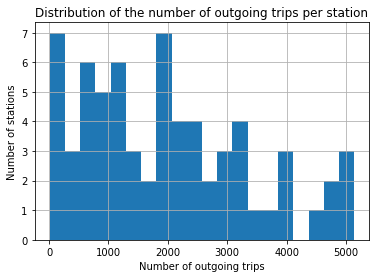

In [187]:
#Creation of a list with the sorted number of outgoing trips from each Starting Station ID
outgoing_counts=pd.value_counts(trips['Starting Station ID'].values, sort=True)

#We plot it
plot =outgoing_counts.hist(bins=20)

plot.set(xlabel = 'Number of outgoing trips', ylabel= 'Number of stations', title = 'Distribution of the number of outgoing trips per station')

__\* Briefly explain your approach for every query here \*__

In [241]:
#___creation of a DataFrame with all the useful data_________
trips_w_time['Round Trip'] = pd.Series((trips_w_time['Starting Station ID'] - trips_w_time['Ending Station ID'])==0)
trips_w_time.head()

#creation of a DataFrame with only the trip before noon and the Round Trip category
trips_b_noon = trips_w_time[trips_w_time['Start Time'].dt.hour < 12]

trips_b_noon.head()


,Bike ID,End Time,Ending Station ID,Passholder Type,Start Time,Starting Station ID,Trip ID,Round Trip
0,6281.0,2016-07-07 04:20:00,3014.0,Monthly Pass,2016-07-07 04:17:00,3014.0,1912818,True
1,6281.0,2016-07-07 06:33:00,3014.0,Monthly Pass,2016-07-07 06:00:00,3014.0,1919661,True
2,5861.0,2016-07-07 10:37:00,3016.0,Flex Pass,2016-07-07 10:32:00,3016.0,1933383,True
3,5861.0,2016-07-07 13:38:00,3016.0,Flex Pass,2016-07-07 10:37:00,3016.0,1944197,True
190,5897.0,2016-07-08 00:41:00,3005.0,Monthly Pass,2016-07-08 00:24:00,3014.0,1989332,False


In [282]:
#________calculate the pourcentage for each combination_________
rounde=trips_b_noon[trips_b_noon['Round Trip'].apply(lambda x:x==True)]
print(len(rounde))

oneway=trips_b_noon[trips_b_noon['Round Trip'].apply(lambda x:x==False)]

percentages= pd.DataFrame({'Percentage round':rounde['Passholder Type'].value_counts(normalize=True,sort=False),
                               'Percentage oneway':oneway['Passholder Type'].value_counts(normalize=True,sort=False)})

percentages


3351


,Percentage round,Percentage oneway
Flex Pass,0.037601,0.076172
Monthly Pass,0.315428,0.705418
Staff Annual,0.011638,0.002785
Walk-up,0.635333,0.215625


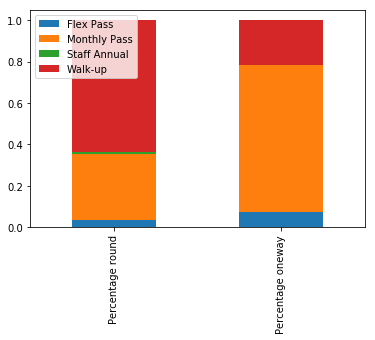

In [290]:
percentages.transpose().plot.bar(stacked=True)